In [54]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

# 自定义模型并训练参数

False False
True False


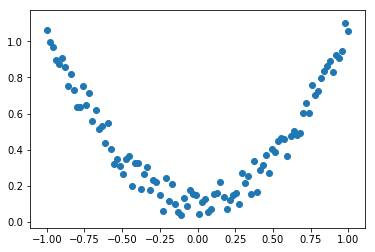

In [61]:
# 制作训练数据
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(2) + 0.2*torch.rand(x.size())
print(x.requires_grad, y.requires_grad)
x.requires_grad_(True)
# y.requires_grad_(True)  # 这个似乎不需要反向传递
print(x.requires_grad, y.requires_grad)
plt.scatter(x.data.numpy(), y.numpy())

In [56]:
# 自定义模型
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        # 定义层信息
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        # 定义层与层之间的前向连接
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


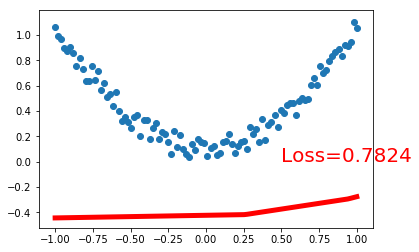

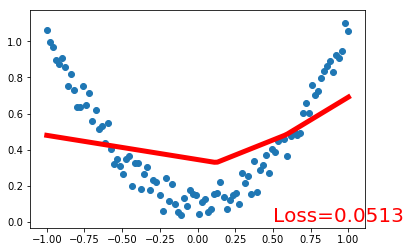

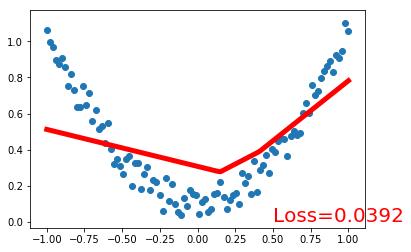

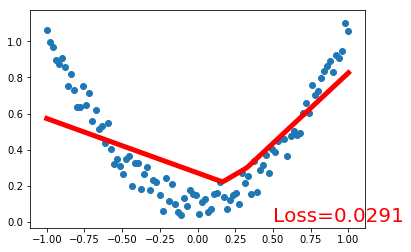

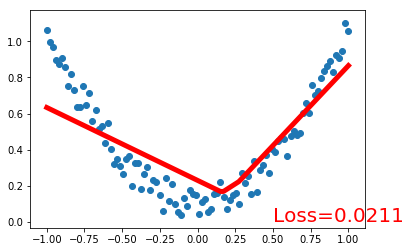

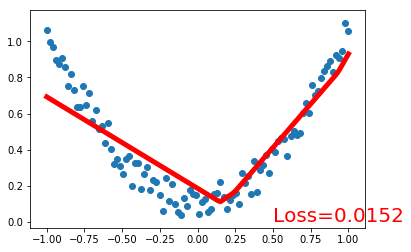

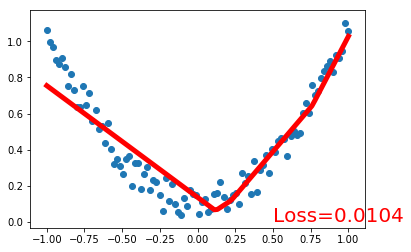

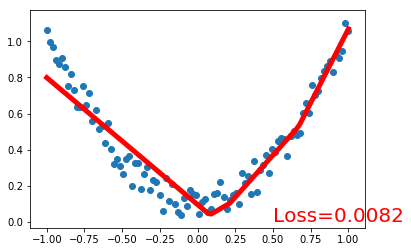

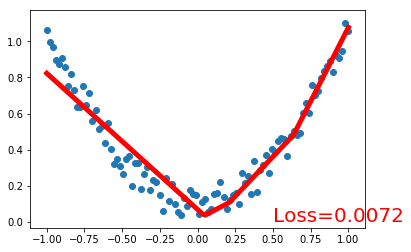

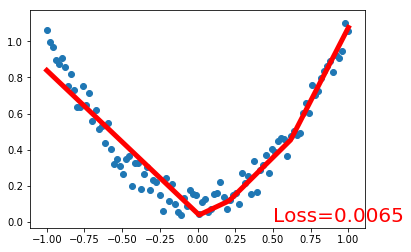

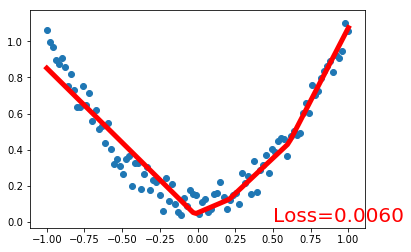

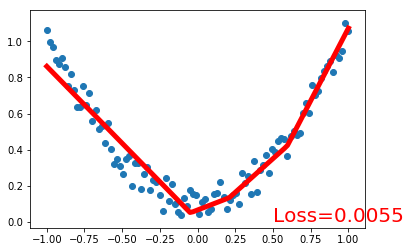

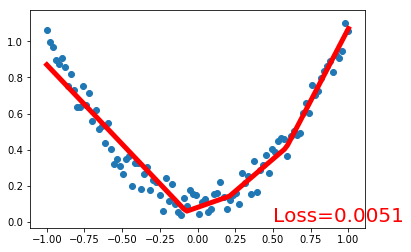

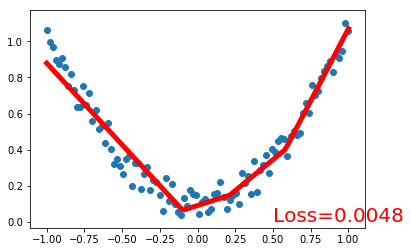

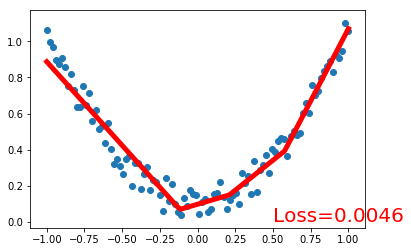

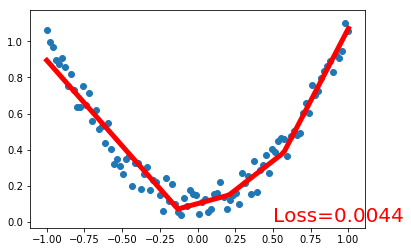

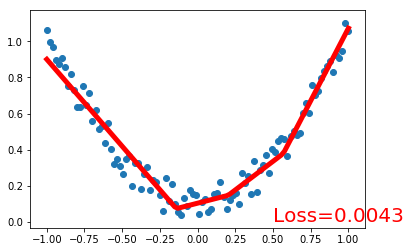

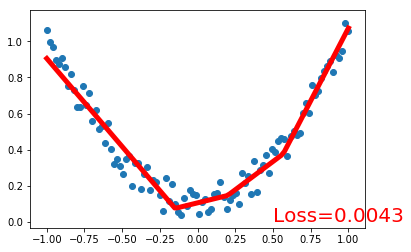

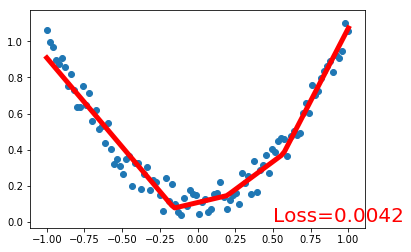

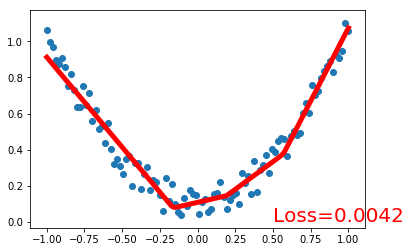

In [65]:
net1 = Net(1, 10, 1)
print(net1)

# 训练参数
optimizer = torch.optim.SGD(net1.parameters(), lr=0.1)
loss_func = torch.nn.MSELoss()  # 回归任务常用的损失函数

# plt.ion()  # 在jupyter中不好使
for t in range(1000):
    # 训练100次
    prediction = net1(x)
    loss = loss_func(prediction, y)  # 计算损失
    optimizer.zero_grad()  # 清理上次反向传播梯度留下的梯度信息
    loss.backward()  # 反向传播梯度
    optimizer.step()  # 更新参数
    
    # 可视化训练过程
    if t % 50 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.item(), fontdict={'size':20, 'color': 'red'})
        plt.pause(0.1)
        plt.show()  # 在jupyter notebook中需要放在这个位置来把过程打印出来

# 保存

In [67]:
torch.save(net1, 'net1.pkl')  # 保存整个模型
torch.save(net1.state_dict(), 'net1_params.pkl')  # 保存模型参数

D:\Anaconda3\lib\site-packages\torch\serialization.py:256: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


# 导入

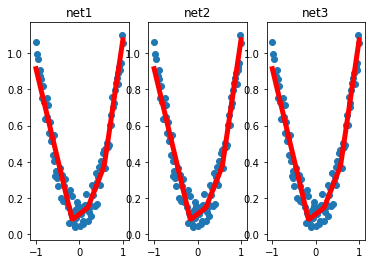

In [71]:
# 提取整个模型
net2 = torch.load('net1.pkl')

# 提取模型参数
net3 = Net(1, 10 ,1)
net3.load_state_dict(torch.load('net1_params.pkl'))

x.detach() # stop x from tracking history
# 可视化比较三个模型的功能，都是一样的
plt.subplot(131)
plt.title('net1')
plt.scatter(x.data.numpy(), y.numpy())
plt.plot(x.data.numpy(), net1(x).data.numpy(), 'r-', lw=5)
plt.subplot(132)
plt.title('net2')
plt.scatter(x.data.numpy(), y.numpy())
plt.plot(x.data.numpy(), net2(x).data.numpy(), 'r-', lw=5)
plt.subplot(133)
plt.title('net3')
plt.scatter(x.data.numpy(), y.numpy())
plt.plot(x.data.numpy(), net3(x).data.numpy(), 'r-', lw=5)